In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from libsvm.svmutil import *
import scipy

def transformdata(file):
    data = np.genfromtxt(file)
    y, X = data[:, 0], data[:, 1:]
    return X, y


In [76]:
#train
y_train,Xtrain=svm_read_problem('satimage.scale.txt',return_scipy=True)

#test
y_test,Xtest=svm_read_problem('satimage.scale.t',return_scipy=True)

#c = X_train.tocoo()
X_train=Xtrain.toarray()
X_test=Xtest.toarray()

#m = svm_train(y_test[:200], X_test[:200, :], '-c 4')
#print(X_test[:,0])


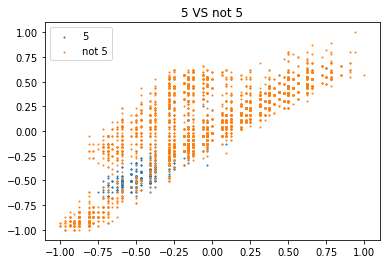

In [73]:
#作图
plt.scatter(X_train[y_train == 5][:, 0], X_train[y_train == 5][:, 1], s=1, label='5')
plt.scatter(X_train[y_train != 5][:, 0], X_train[y_train != 5][:, 1], s=1, label='not 5')
plt.title('5 VS not 5')
plt.legend()
plt.show()


In [77]:
###Problem 11
#训练模型并作图
y_train_1 = (y_train==5).astype("int")
#C = [-6, -4, -2, 0, 2]
C = [1]
W = []

for i in C:
    c = 10 ** i
    clf = svm.SVC(kernel="linear", C=c)
    clf.fit(X_train, y_train_1)
    w = clf.coef_
    W.append(np.linalg.norm(w))

W
#plt.plot(C, W)
#plt.title("$||w||$ vs $log_{10}C$")
#plt.show()


[4.646266066207985]

In [78]:

####Problem 12
#plt.scatter(X_train[y_train == 8][:, 0], X_train[y_train == 8][:, 1], s=1, label='8')
#plt.scatter(X_train[y_train != 8][:, 0], X_train[y_train != 8][:, 1], s=1, label='not 8')
#plt.title('8 VS not 8')
#plt.legend()
#plt.show()

#训练
y_trian_8 = 2 * (y_train==8).astype("int") - 1
C = [-6, -4, -2, 0, 2]
Ein = []
alpha = []
for i in C:
    c = 10 ** i
    clf = svm.SVC(kernel='poly', degree=2, coef0=1, gamma=1, C=c)
    clf.fit(X_train, y_trian_8)
    e = np.mean(clf.predict(X_train) != y_trian_8)
    #支持向量的索引
    support = clf.support_
    #计算系数
    coef = np.sum(clf.dual_coef_[0] * y_trian_8[support])
    alpha.append(coef)
    Ein.append(e)

#作图
plt.plot(C, Ein)
plt.title("$\log_{10}C$ VS $E_{in}$")
plt.show()


ValueError: The number of classes has to be greater than one; got 1 class

In [79]:
#训练
y_trian_8 = 2 * (y_train==6).astype("int") - 1
C = [1]
Ein = []
alpha = []
for i in C:
    c = 10 ** i
    clf = svm.SVC(kernel='poly', degree=3, coef0=1, gamma=1, C=c)
    clf.fit(X_train, y_trian_8)
    e = np.mean(clf.predict(X_train) != y_trian_8)
    #支持向量的索引
    support = clf.support_
    #计算系数
    coef = np.sum(clf.dual_coef_[0] * y_trian_8[support])
    alpha.append(coef)
    Ein.append(e)

support
Ein



[0.002931228861330327]

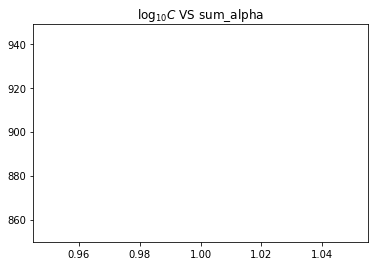

In [65]:

####Problem 13
plt.plot(C, alpha)
plt.title("$\log_{10}C$ VS sum_alpha")
plt.show()


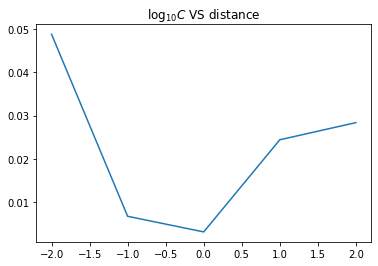

In [82]:

####Problem 14
C = [-2, -1, 0, 1, 2]
Distance = []
#将标签修改为-1, 1
y_train_3 = (y_train==1).astype("int")
y = 2 * y_train_3 - 1

for i in C:
    c = 10**i
    clf = svm.SVC(kernel='rbf', gamma=10, C=c)
    clf.fit(X_train, y)
    X = X_train[clf.support_]
    #距离矩阵
    d1 = np.sum(X ** 2, axis=1).reshape(-1, 1)
    d2 = np.sum(X ** 2, axis=1).reshape(1, -1)
    dist = d1 + d2 - 2 * X.dot(X.T)
    #Kernel矩阵
    K = np.exp(- c * dist)
    #计算anyn
    y1 = clf.dual_coef_[0] * y[clf.support_]
    w2 = y1.dot(K).dot(y1.T)
    #计算距离
    distance = 1 / np.sqrt(w2)
    Distance.append(distance)
    
plt.plot(C, Distance)
plt.title("$\log_{10}C$ VS distance")
plt.show()


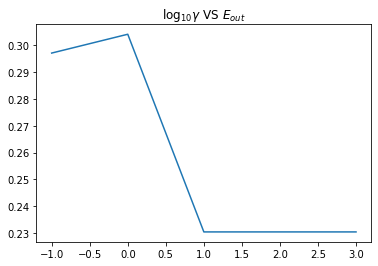

In [83]:

####Problem 15
y_test_1 = (y_test == 1)

Gamma = [-1,0,1,2,3]
Eout = []

for i in Gamma:
    gamma = 10**i
    clf = svm.SVC(kernel='rbf', gamma=gamma, C=0.1)
    clf.fit(X_train, y_train_1)
    e = np.mean(clf.predict(X_test) != y_test_1)
    Eout.append(e)
    
plt.plot(Gamma, Eout)
plt.title("$\log_{10}\gamma$ VS $E_{out}$")
plt.show()


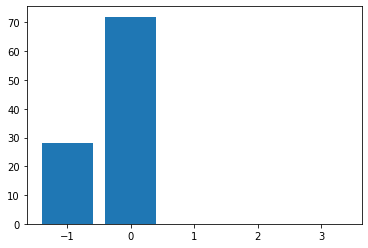

In [61]:

####Problem 16
from sklearn.model_selection import train_test_split

#对数据合并，方便调用train_test_split函数
Data = np.c_[X_train, y_train]
N = 100
#N = 1000
#记录最小Eval对应的gamma的索引的次数
Cnt = np.zeros(5)
Gamma = [-1,0,1,2,3]

for _ in range(N):
    #划分数据
    train_set, val_set = train_test_split(Data, test_size=0.05)
    #取特征
    X_train = train_set[:, :36]
    #取标签
    y_train = train_set[:, 36]
    X_val = val_set[:, :36]
    y_val = val_set[:, 36]
    Eval = []

    for i in Gamma:
        gamma = 10**i
        clf = svm.SVC(kernel='rbf', gamma=gamma, C=0.1)
        clf.fit(X_train, y_train.astype('int'))
        e = np.mean(clf.predict(X_val) != y_val)
        Eval.append(e)
    #找到最小Eval对应的索引
    index = np.argmin(Eval)
    #对应索引次数加1
    Cnt[index] += 1

plt.bar(Gamma, Cnt)
plt.show()